#### 2. Random Sample  Imputation

Aim: Random Sample Imputation consist of taking random observation froom the Dataset and we use this observation to replace the NAN values.  

When should it be used?  
It assumes that the data are missing completly at random(MCAR)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Survived'])


In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df.isnull().mean()  ## Percent of null value

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [6]:
df['Age'].isnull().sum()

177

In [7]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)  ## it put any random value in place of null value

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [8]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [55]:
def impute_nan(df,variable,median):
    df[variable+'_median']=df[variable].fillna(median)
    df[variable+'_random']=df[variable]
    ## It will have the random smaple to fill the NAN value
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ## Pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [56]:
median=df.Age.median()

In [57]:
median

28.0

In [58]:
impute_nan(df,'Age',median)

In [59]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

##  standard deviation  graphical viusal to understand

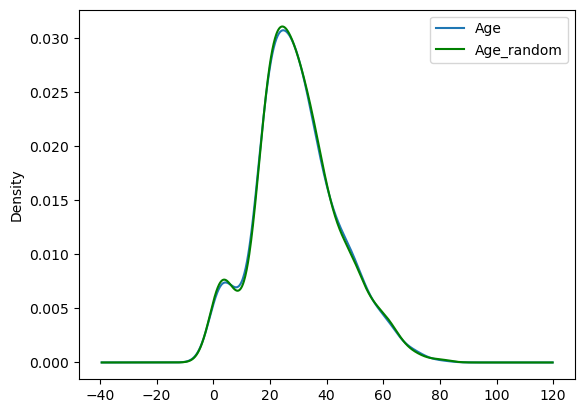

In [65]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

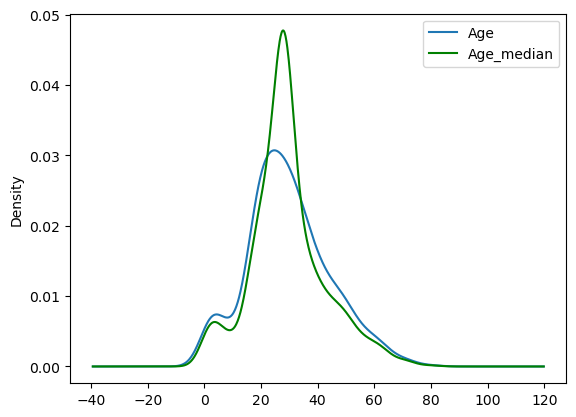

In [66]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

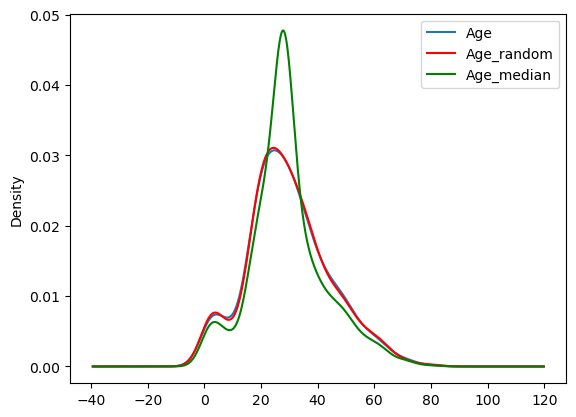

In [67]:
fig = plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_random.plot(kind='kde',ax=ax,color='red')
df.Age_median.plot(kind='kde',ax=ax,color='green')
lines, labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

Observation:  
we go with Age_random insted of Age_median

##### Advantages
1. Easy to implement.
2. There is less or minimum distortion in variance.

##### Disadvantages
1. In every situation randomness won't work.

#### 3. Capturing NAN values with a new feature

It works well if the data is not missing completly at random(MNAR).

In [69]:
df=pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Survived'])

In [71]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [73]:
df['Age_NaN']=np.where(df['Age'].isnull(),1,0)

In [74]:
df.head()

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [79]:
df['Age_NaN'].isnull().sum()

0

In [82]:
df.Age.mean()

29.69911764705882

In [84]:
df.Age.median()

28.0

In [85]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [87]:
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


##### Advantages
1. Easy to implement.
2. It capute the importance of missing values.
   
##### Disadvantages
1. Creating Additional Features the may lead (Curse of Dimensionallity)

#### 4. End of Distribution Imputation  

A value is chosen from the end of the distribution of the data and the value is used to fill in the missing values of the column.

In [133]:
df=pd.read_csv('titanic/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

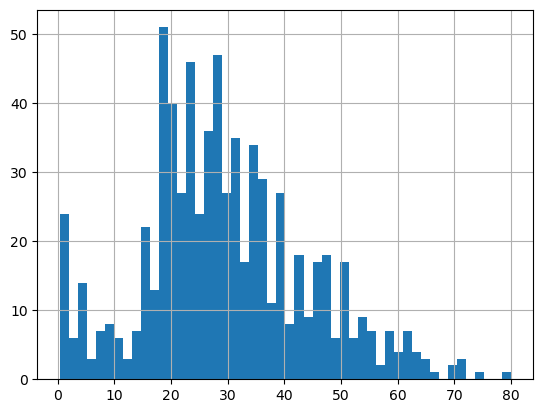

In [134]:
df.Age.hist(bins=50)

In [137]:
df.Age.mean()

29.69911764705882

In [138]:
extreme=df.Age.mean()+3*df.Age.std() ##  end of the distribution # Determine threshold for high-end outliers in 'Age' using 3 standard deviations above the mean.
extreme

73.27860964406095

<Axes: xlabel='Age'>

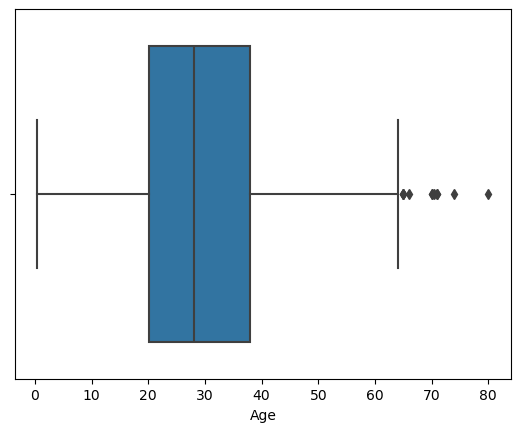

In [139]:
import seaborn as sns
sns.boxplot(x='Age' , data=df)

In [140]:
def impute_Naan(df,variable,median,extreme):
    df[variable+'_end_distribution']=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [141]:
impute_Naan(df,'Age',df.Age.median(),extreme)

In [142]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<Axes: >

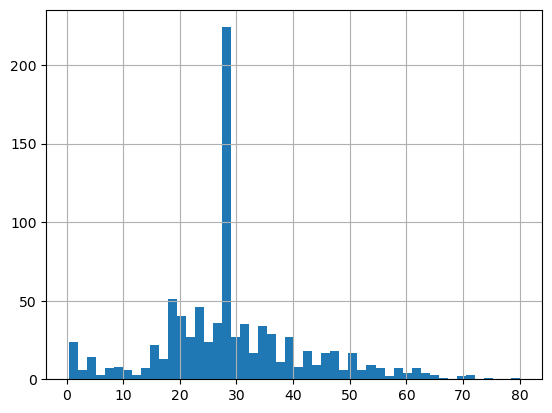

In [143]:
df['Age'].hist(bins=50)

Observation:  
All the NaN values Are change with median.

<Axes: >

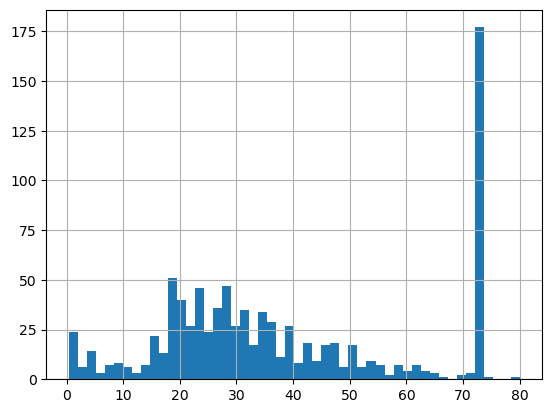

In [144]:
df['Age_end_distribution'].hist(bins=50)

Observation:  
All the NaN values Are change with end value of median.

<Axes: xlabel='Age_end_distribution'>

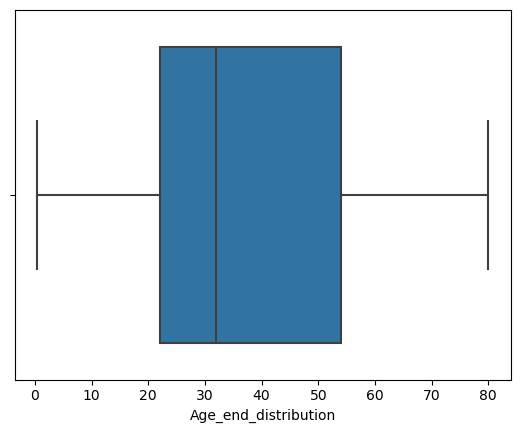

In [148]:
sns.boxplot(x='Age_end_distribution',data=df)

Here we see that all the oulier are gone 

##### Advantages 
1. Easy to implement
2. Capture the importance of missingess if there is one

##### Disadvantages
1. Distorts the original distribution of the variable
2. if missingess is not important .it may mask the predictive power of the original variable by distorting it's distribution.
3. If number of NA is big ,it will mask true outlier in the distribution.
4. If the number of NA is small, the replace NA may be considerd an outlier and pre-proceed in a subsequent fe